In [66]:
# Amia Yi
# Group: Kevin Fan
# CMSC320 0201
# UID 118753201

In [67]:
# imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

In [68]:
# part 1
# this code starts up sqlite with the 2014 baseball dataset
# and joins the teams and salaries tables via year and team IDs to
# create a pandas dataframe with franchise ID, win percentages, wins, total games, and total salary paid
# per year and team combination

# sqlite setup
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

In [69]:
# table setup with SQL code
# there does not appear to be any missing data in relevant rows for this table - all team and player
# salaries are filled out in the original table, along with franchise IDs, wins and games




# (KEVIN HELP HELPPPPPP I DONT KNOW WHY ITS ASKING THIS I DONT EVEN KNOW HOW ID CHECK FOR MISSING DATA




query = """SELECT t.yearID, t.teamID, t.franchID as franchiseID, (t.W * 1.0 / t.G * 100) as winning_percentage, t.W as wins, t.G as games,
            sum(s.salary) as total_salary
            FROM Teams as t
            JOIN Salaries as s ON t.yearID = s.yearID AND t.teamID = s.teamID
            WHERE t.yearID >= 1990
            GROUP BY t.yearID, t.teamID"""
# put into pandas dataframe and display
df = pd.read_sql(query, conn)
df


,yearID,teamID,franchiseID,winning_percentage,wins,games,total_salary
0,1990,ATL,ATL,40.123457,65,162,14555501.0
1,1990,BAL,BAL,47.204969,76,161,9680084.0
2,1990,BOS,BOS,54.320988,88,162,20558333.0
3,1990,CAL,ANA,49.382716,80,162,21720000.0
4,1990,CHA,CHW,58.024691,94,162,9491500.0
...,...,...,...,...,...,...,...
723,2014,SLN,STL,55.555556,90,162,120693000.0
724,2014,TBA,TBD,47.530864,77,162,72689100.0
725,2014,TEX,TEX,41.358025,67,162,112255059.0
726,2014,TOR,TOR,51.234568,83,162,109920100.0


Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014). 

It will be a single plot with a line for each team. It is a plot between payroll on the y-axis and year (1990 - 2014) on the x-axis

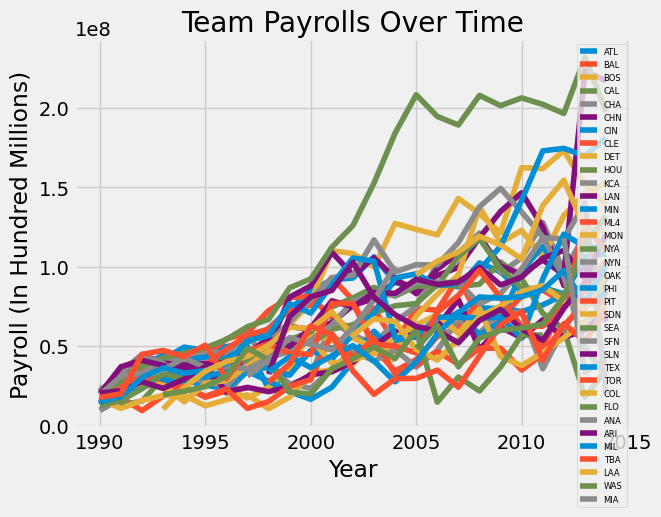

In [151]:
slopes = []
for team in df['teamID'].unique():
    #form lists of salaries from each team and map them to correct dates - can prob df.plot(kind = 'line')
    x = list(df.loc[df['teamID'] == team, 'yearID'])
    y = list(df.loc[df['teamID'] == team, 'total_salary'])
    m, b = np.polyfit(x, y, 1)
    slopes.append(m)
    plt.plot(x, y, label = team)
    plt.title('Team Payrolls Over Time')
    plt.xlabel('Year')
    plt.ylabel('Payroll (In Hundred Millions)')
    plt.legend(loc=1, prop={'size': 6})
    plt.show
avg_slopes = np.mean(slopes)

#### Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

In [71]:
print("There is a general tendency for team payrolls to increase over time, as there is a positive correlation between year and payroll.")
print(f'This is evidenced by the mean slope of all regression lines pertaining to team payrolls over time being {np.round(avg_slopes, 2)}.')
print("The positive number indicates a strong positive relation.")

There is a general tendency for team payrolls to increase over time, as there is a positive correlation between year and payroll.
This is evidenced by the mean slope of all regression lines pertaining to team payrolls over time being 2364380.73.
The positive number indicates a strong positive relation.


<function matplotlib.pyplot.show(close=None, block=None)>

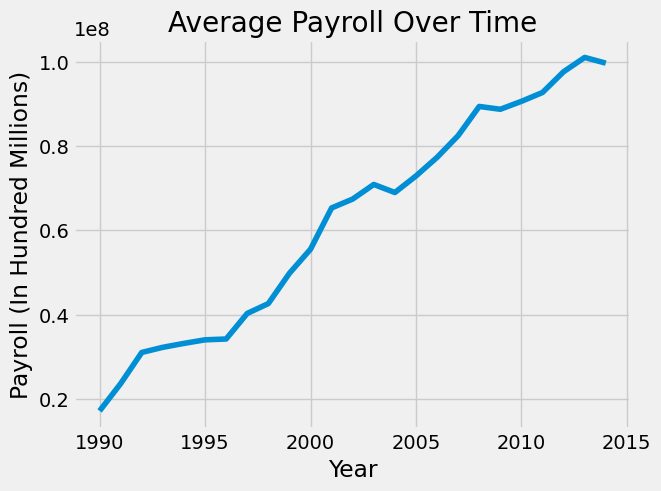

In [72]:
# problem 3

# this code produces a graph of mean team payroll over time by taking the mean of
# all team payrolls per year from the dataframe and grpahing it with matplotlib

plt.clf()
x = []
y = []
for year in df['yearID'].unique():
    # get average of team payroll per year and put on plot
    x.append(year)
    y.append(np.average(list(df.loc[df['yearID'] == year, 'total_salary'])))
plt.plot(x, y)
plt.title('Average Payroll Over Time')
plt.xlabel('Year')
plt.ylabel('Payroll (In Hundred Millions)')
plt.show

In [73]:
# problem 4

# this code makes 5 bins for year time periods to discretize the data, then makes
# scatterplots for each comparing mean winning percentage to mean payroll
# it also adds a regression line using polyfit for easier viewing

# cut the dataframe
df["time_period"] = pd.cut(x = df['yearID'], right = False, bins = [1990, 1995, 2000, 2005, 2010, 2015], \
                          labels = ["1990-1994", "1995-1999", "2000-2004", "2005-2009", "2010-2014"])

<function matplotlib.pyplot.show(close=None, block=None)>

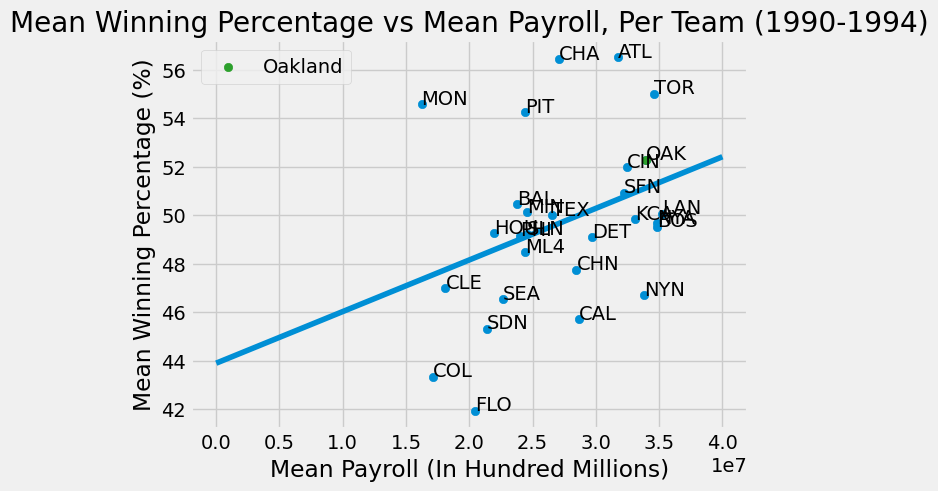

In [74]:
# scatterplot for 1990-1994
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "1990-1994"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'total_salary'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
a = 0
# add labels to every team
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'total_salary']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
polyline = np.linspace(1, 40000000, 50)
plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Mean Payroll, Per Team (1990-1994)')
plt.xlabel('Mean Payroll (In Hundred Millions)')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

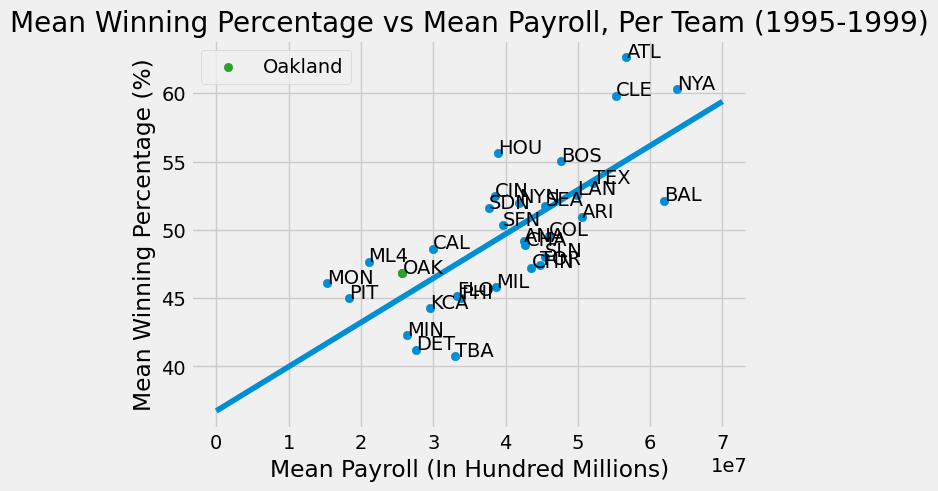

In [75]:
# scatterplot for 1995-1999
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "1995-1999"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'total_salary'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'total_salary']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(1, 70000000, 50)
plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Mean Payroll, Per Team (1995-1999)')
plt.xlabel('Mean Payroll (In Hundred Millions)')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

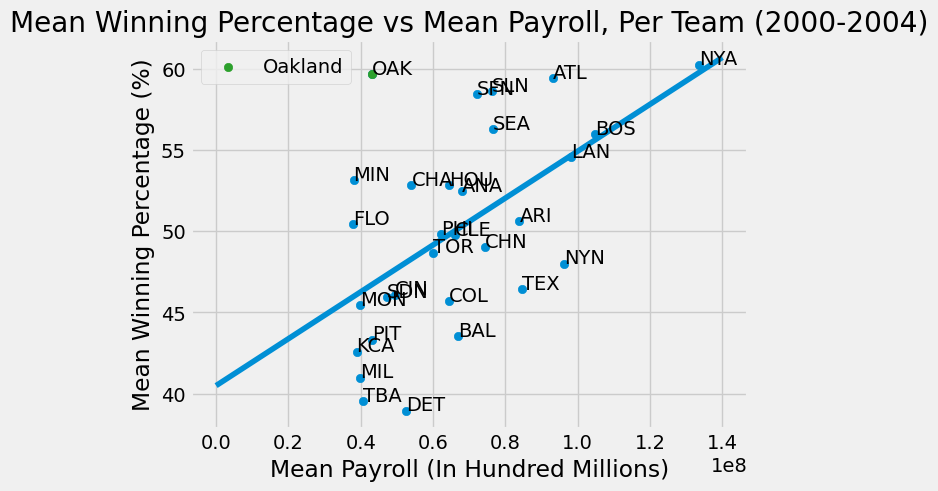

In [76]:
# scatterplot for 2000-2004
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2000-2004"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'total_salary'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'total_salary']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(1, 140000000, 50)
plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Mean Payroll, Per Team (2000-2004)')
plt.xlabel('Mean Payroll (In Hundred Millions)')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

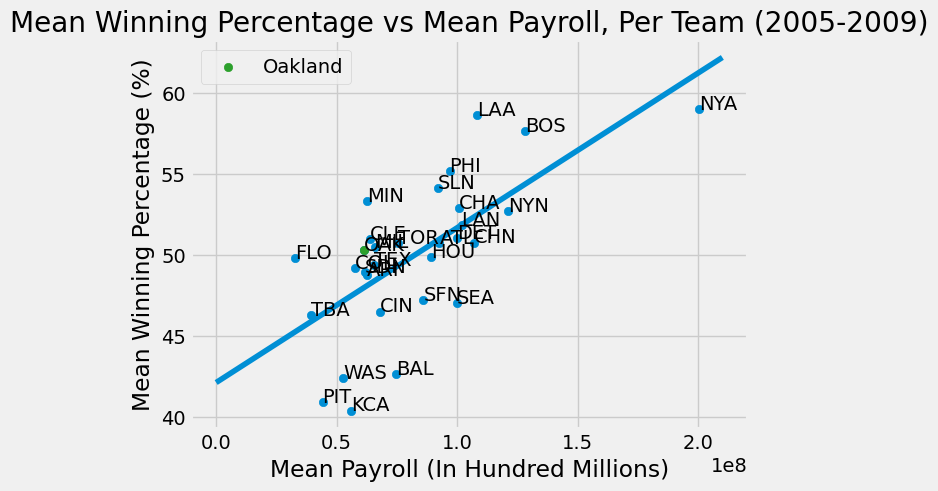

In [77]:
# scatterplot for 2005-2009
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2005-2009"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'total_salary'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'total_salary']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(1, 210000000, 50)
plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Mean Payroll, Per Team (2005-2009)')
plt.xlabel('Mean Payroll (In Hundred Millions)')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

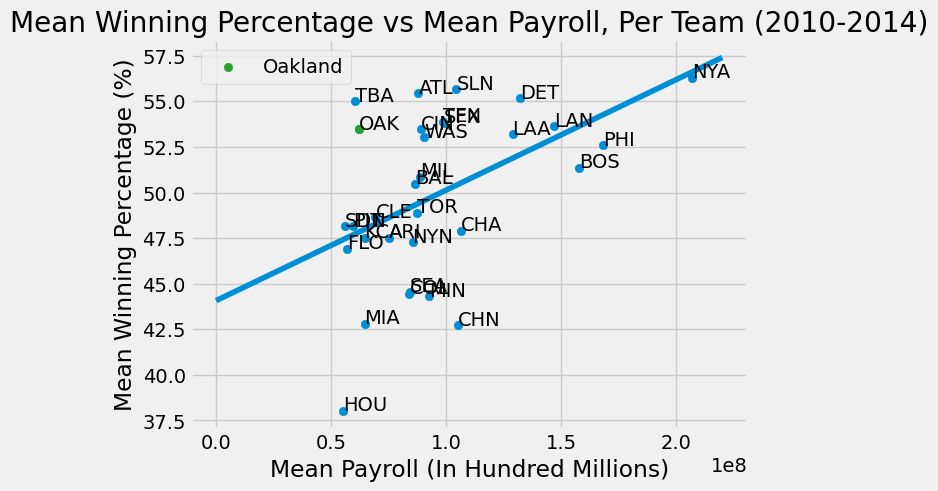

In [78]:
# scatterplot for 2010-2014
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2010-2014"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'total_salary'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'total_salary']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(1, 220000000, 50)
plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Mean Payroll, Per Team (2010-2014)')
plt.xlabel('Mean Payroll (In Hundred Millions)')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

#### Question 2

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

In [84]:
# Problem 5

# Create a new variable in your dataset that standardizes payroll conditioned on year. 
# It may help to merge salaries and the win percentages tables. 
# So, this column for team i in year j should equal: (payroll(ij) - mean payroll for year j)/s(j)
# Where s is the standard deviation of payroll in year j

standardized_payroll = []
years = df['yearID'].unique()
for year in years:
    avg_sal = np.mean(df.loc[df['yearID'] == year, 'total_salary'])
    std = np.std(df.loc[df['yearID'] == year, 'total_salary'])
    for payroll in df.loc[df['yearID'] == year, 'total_salary']:
        standardized_payroll.append((payroll - avg_sal)/std)
df['standardized_payroll'] = standardized_payroll
df


,yearID,teamID,franchiseID,winning_percentage,wins,games,total_salary,time_period,standardized_payroll
0,1990,ATL,ATL,40.123457,65,162,14555501.0,1990-1994,-0.680490
1,1990,BAL,BAL,47.204969,76,161,9680084.0,1990-1994,-1.998674
2,1990,BOS,BOS,54.320988,88,162,20558333.0,1990-1994,0.942516
3,1990,CAL,ANA,49.382716,80,162,21720000.0,1990-1994,1.256600
4,1990,CHA,CHW,58.024691,94,162,9491500.0,1990-1994,-2.049662
...,...,...,...,...,...,...,...,...,...
723,2014,SLN,STL,55.555556,90,162,120693000.0,2010-2014,0.464941
724,2014,TBA,TBD,47.530864,77,162,72689100.0,2010-2014,-0.603311
725,2014,TEX,TEX,41.358025,67,162,112255059.0,2010-2014,0.277168
726,2014,TOR,TOR,51.234568,83,162,109920100.0,2010-2014,0.225207


<function matplotlib.pyplot.show(close=None, block=None)>

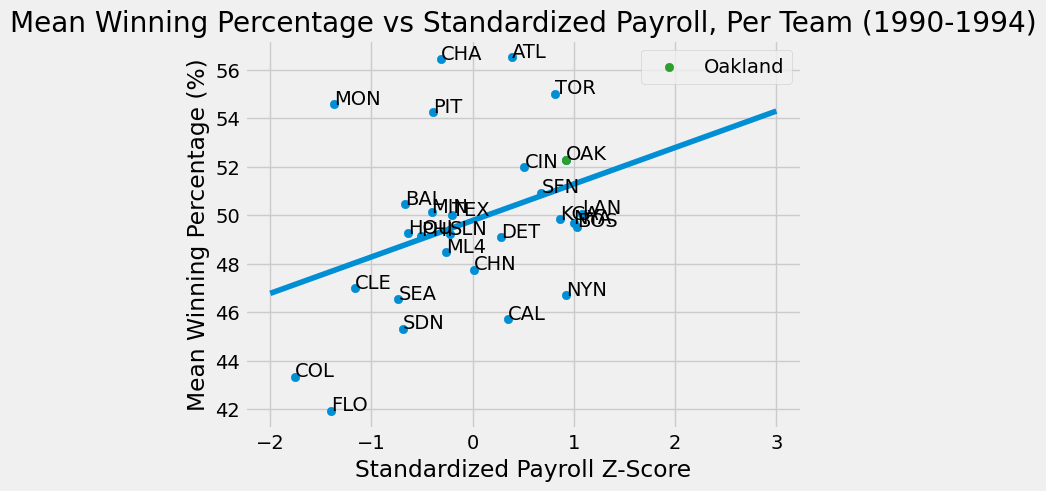

In [133]:
# scatterplot for 1990-1994
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "1990-1994"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Standardized Payroll, Per Team (1990-1994)')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

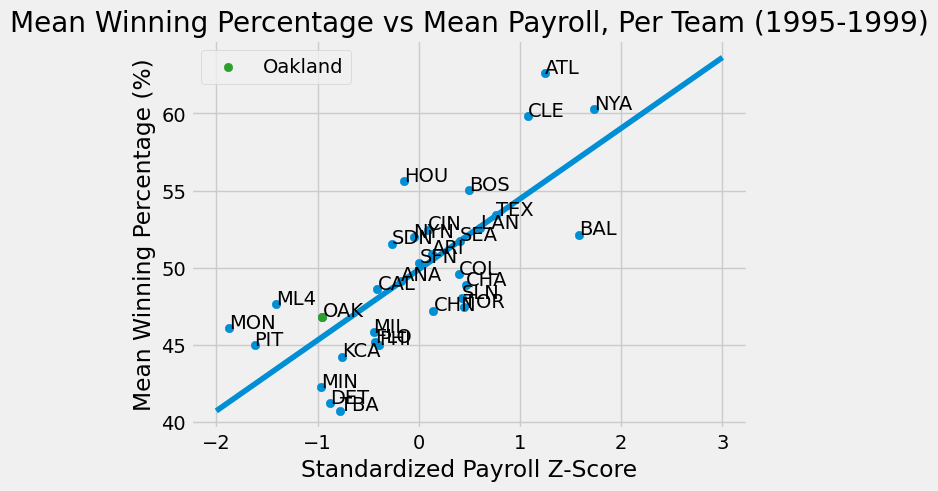

In [126]:
# scatterplot for 1995-1999
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "1995-1999"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Standardized Payroll, Per Team (1995-1999)')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

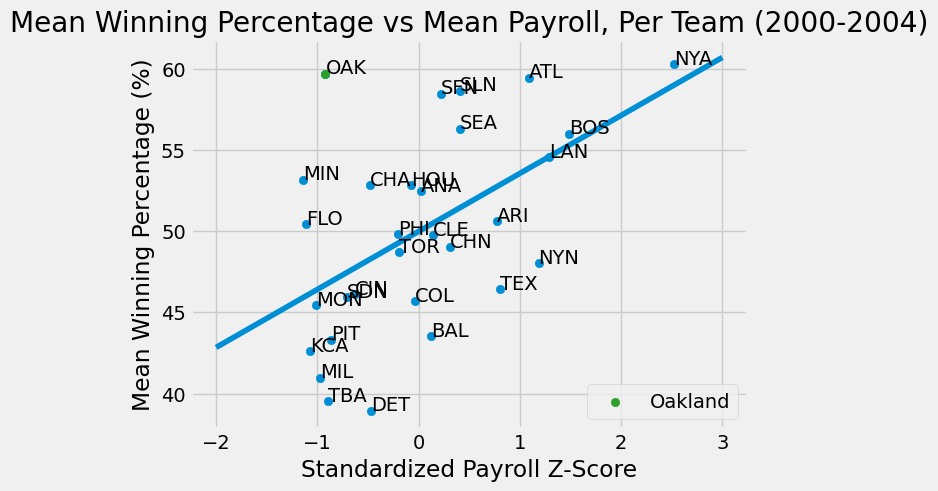

In [127]:
# scatterplot for 1990-1994
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2000-2004"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vsStandardized Payroll, Per Team (2000-2004)')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

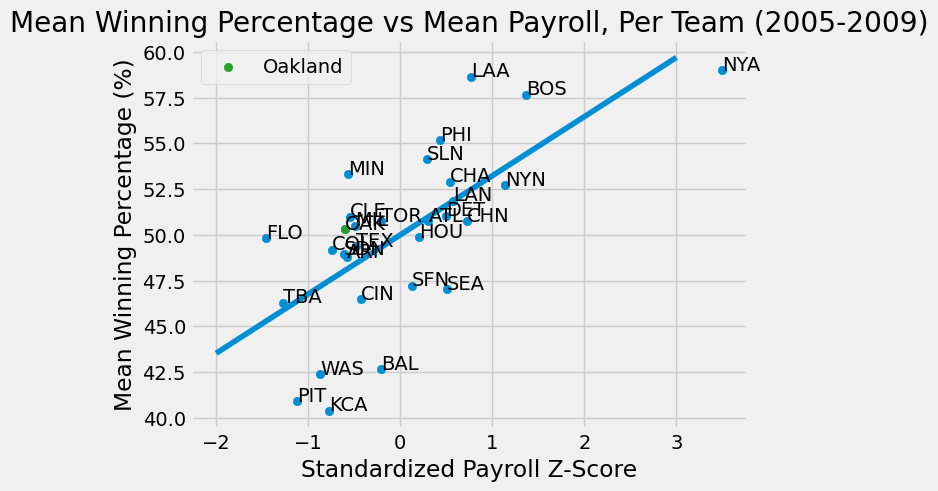

In [128]:
# scatterplot for 1990-1994
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2005-2009"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Standardized Payroll, Per Team (2005-2009)')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

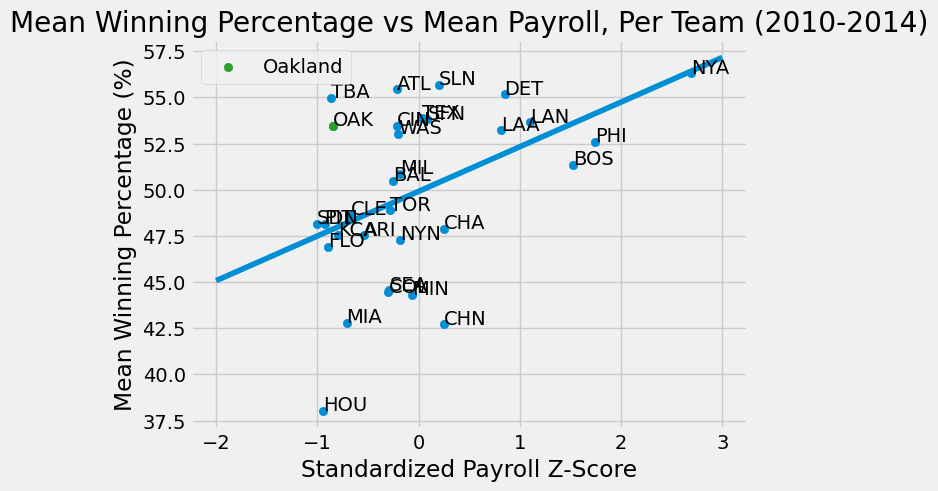

In [125]:
# scatterplot for 2010-2014
plt.clf()
x = []
y = []
teams = []
df2 = df[df["time_period"] == "2010-2014"]
for team in df2['teamID'].unique():
    x.append(np.average(list(df2.loc[df2['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df2.loc[df2['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df2.loc[df2['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df2.loc[df2['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
plt.title('Mean Winning Percentage vs Standardized Payroll, Per Team (2010-2014)')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.show

3.258816080263813
49.88988769784575


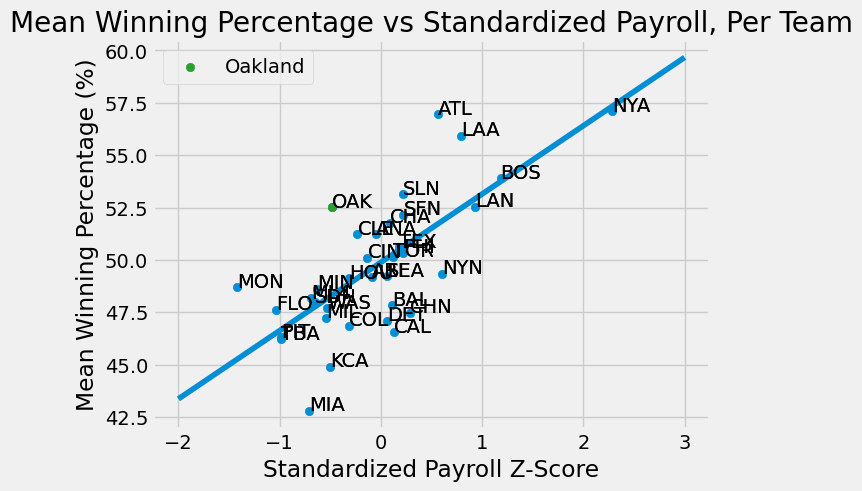

In [139]:
# Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). 
# Add a regression line to highlight the relationship. 
# The regression line gives you expected winning percentage as a function of standardized payroll.  
# Looking at the regression line, it looks like teams that spend roughly the average payroll in a given year will win 50% of their games 
# (i.e. win\_pct is 50 when standardized\_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll 
# (i.e., win\_pct is 55 when standardized\_payroll is 2). 
# We will see how this is done in general using linear regression later in the course.

plt.clf()
x = []
y = []
teams = []
for team in df['teamID'].unique():
    x.append(np.average(list(df.loc[df['teamID'] == team, 'standardized_payroll'])))
    y.append(np.average(list(df.loc[df['teamID'] == team, 'winning_percentage'])))
    teams.append(team)
plt.scatter(x, y)
# plot a distinct oakland point for easy viewing of performance
plt.scatter([np.average(list(df.loc[df['teamID'] == "OAK", 'standardized_payroll']))], \
                    [np.average(list(df.loc[df['teamID'] == "OAK", 'winning_percentage']))], c='tab:green', label="Oakland")
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)

plt.plot(polyline, np.poly1d(np.polyfit(x, y, 1))(polyline))
m, b = np.polyfit(x, y, 1)
plt.title('Mean Winning Percentage vs Standardized Payroll, Per Team')
plt.xlabel('Standardized Payroll Z-Score')
plt.ylabel('Mean Winning Percentage (%)')
plt.legend()
a = 0
for (i, j) in zip(x, y):
    plt.text(i, j, teams[a])
    a += 1
polyline = np.linspace(-2, 3, 2)
plt.show
print(m)
print(b)

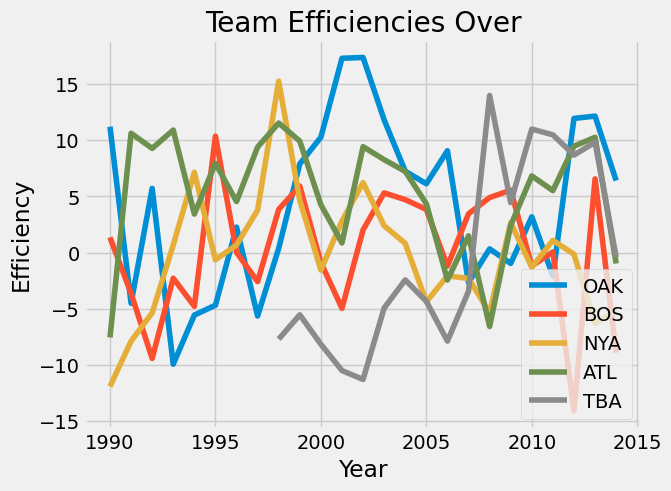

In [142]:
# Problem 8
# create a new spending efficiency field for each team, eff = win_percentage - expected_win_percentage
# expected win percentage is = mx + b where x is the standardized payroll score
# Make a line plot with year on the x-axis and efficiency on the y-axis.
# A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).

df['expected_win'] = (m * df['standardized_payroll']) + b
df['efficiency'] = df['winning_percentage'] - df['expected_win']

teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
for team in teams:
    #form lists of salaries from each team and map them to correct dates - can prob df.plot(kind = 'line')
    x = list(df.loc[df['teamID'] == team, 'yearID'])
    y = list(df.loc[df['teamID'] == team, 'efficiency'])
    plt.plot(x, y, label = team)
    plt.legend()
    plt.title('Team Efficiencies Over Time')
    plt.xlabel('Year')
    plt.ylabel('Efficiency')
    plt.show